Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [3]:
install.packages('moderndive')

library(tidymodels)
library(readr)
library(moderndive)

also installing the dependency 'janitor'





  There are binary versions available but the source versions are later:
           binary source needs_compilation
janitor     2.2.0  2.2.1             FALSE
moderndive  0.5.5  0.7.0             FALSE



installing the source packages 'janitor', 'moderndive'




We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [9]:
hate_crimes = read_csv('http://bit.ly/2ItxYg3.')

Rows: 51 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
hate_crimes |> head()

state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
New Mexico,low,0.69,83,0.295,low,high,low,46686
Maine,low,0.54,90,0.616,low,low,low,51710
New York,low,0.94,85,0.351,low,low,high,54310
Illinois,low,0.90,86,0.195,low,high,high,54916
Delaware,high,0.90,87,0.323,low,low,high,57522
Rhode Island,high,1.00,85,0.095,low,high,high,58633


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

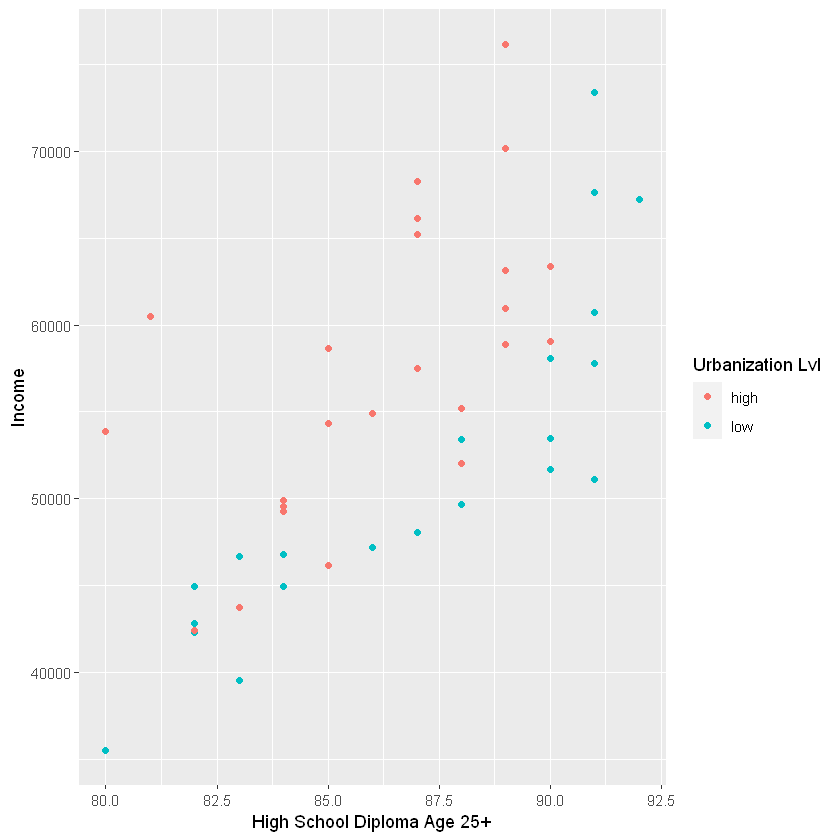

In [21]:
ggplot(hate_crimes |> drop_na()) +
    geom_point(aes(x = hs, y = income, color = urbanization)) +
    labs(x = "High School Diploma Age 25+",
    y = "Income",
    color = "Urbanization Lvl")

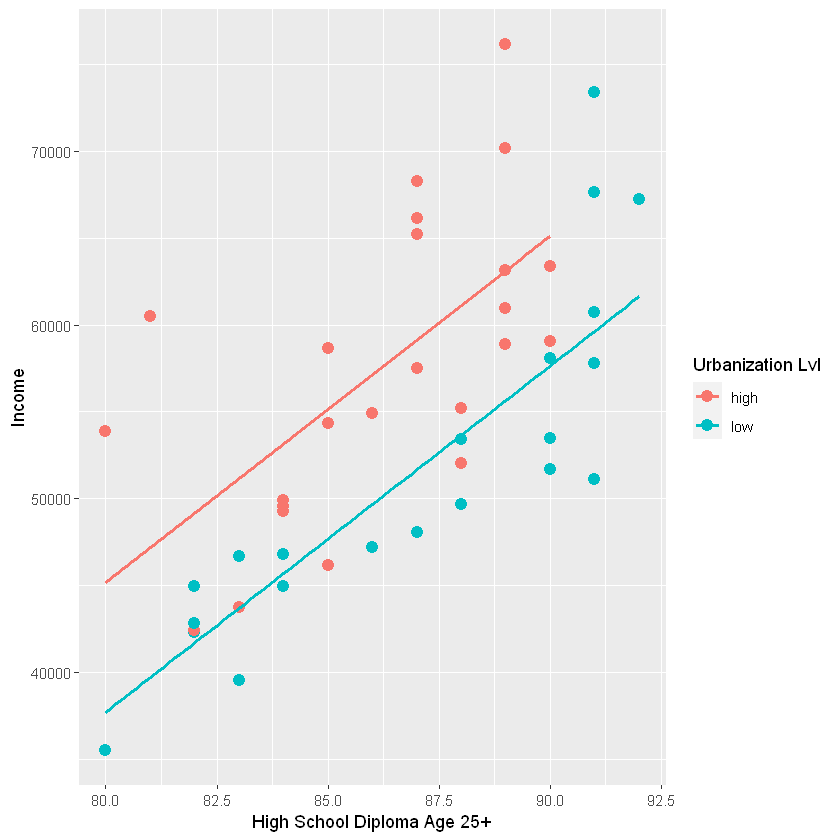

In [38]:
ggplot(hate_crimes |> drop_na()) +
  geom_point(aes(x = hs, y = income, color = urbanization), size = 3) +
  geom_parallel_slopes(aes(x = hs, y = income, color = urbanization), se = FALSE) +
  labs(
    x = "High School Diploma Age 25+",
    y = "Income",
    color = "Urbanization Lvl"
  ) 

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

The high 'urbanization lvl' seems to have a higher intercept comparative to the low 'urbanization lvl'



Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

`geom_smooth()` using formula = 'y ~ x'


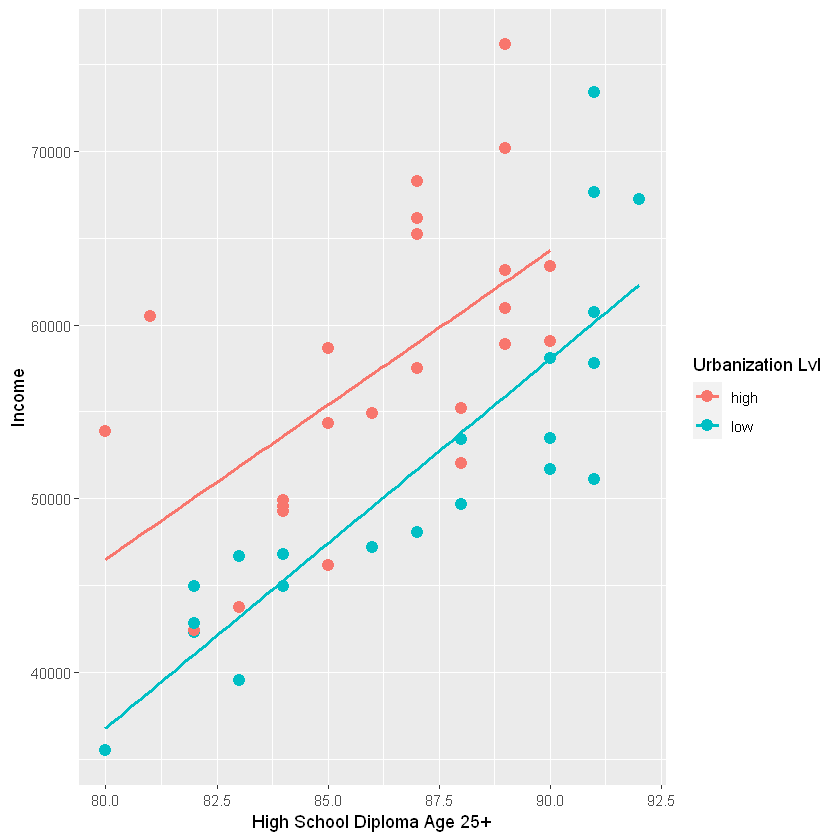

In [40]:
ggplot(hate_crimes |> drop_na()) +
  geom_point(aes(x = hs, y = income, color = urbanization), size = 3) +
  geom_smooth(aes(x = hs, y = income, color = urbanization), method = "lm", se = FALSE) +
  labs(
    x = "High School Diploma Age 25+",
    y = "Income",
    color = "Urbanization Lvl"
  ) 



❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

I believe a more complex "interaction model" that estimates a separate slope is better due to the different variables. The lines only differ by intercept regarding parallel slopes, but the interaction model allows for the hs and income variables to play an affect as they may vary based on the level of urbanization. 

Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [42]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [46]:
# non-parallel slopes model
nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |>
    prep()     

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

nps_mod
# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...





Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [48]:


rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)

income,.pred,.resid,model
<dbl>,<dbl>,<dbl>,<chr>
46686,43845.37,2840.63106,parallel_slopes
51710,57752.93,-6042.92572,parallel_slopes
54310,55152.28,-842.28220,parallel_slopes
54916,57139.08,-2223.07603,parallel_slopes
57522,59125.87,-1603.86985,parallel_slopes
58633,55152.28,3480.71780,parallel_slopes
58875,63099.46,-4224.45751,parallel_slopes
59068,65086.25,-6018.25133,parallel_slopes
60487,47205.11,13281.89310,parallel_slopes


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [50]:
glance(ps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


In [52]:
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

The difference is negligent in my opinion, but based on comparison, I prefer the parrallel slopes model. I chose this model because it has a higher adjusted R^2 and a smaller sigma. It is also simpler and fits better.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:** Income in the states is greater when there is a higher urbanization. Essentially, there is a $7333.33 difference between high and low urbanization.

In [54]:

tidy(ps_mod)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


Income in the states is greater when there is a higher urbanization. Essentially, there is a $7333.33 difference between high and low urbanization.

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:** Based on the coefficient estimate, it is $1968.79 per percent. This is basically showing a positive relationship in my eyes.